# Part 1: Level 4 challenge: Spotify's Worldwide Daily Song Ranking

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data.csv',parse_dates=['Date'],index_col = 0)[['Track Name','Artist','Streams','Date','Region']]
df.dropna(inplace=True)

#### 1.List the top 10 tracks in the global throughout year 2017 with their total stream counts.

In [7]:
#获取2017年的global数据
df2017 = df[(df['Region'] == 'global')&(df['Date'].dt.year == 2017)]

# 按照 "Track Name" 分组，计算每个track的Streams总数
tracks = df2017.groupby('Track Name')['Streams'].sum().reset_index()

# 按照 Streams总数对于tracks进行降序排列，显示前十
top_10_tracks = tracks.sort_values(by='Streams',ascending=False).head(10)
top_10_tracks.index = range(1, 11)
top_10_tracks

,Track Name,Streams
1,Shape of You,1470919913
2,Despacito - Remix,908572590
3,Despacito (Featuring Daddy Yankee),735938109
4,Something Just Like This,682354910
5,Unforgettable,665848199
6,HUMBLE.,650411808
7,I'm the One,629377285
8,It Ain't Me (with Selena Gomez),597594929
9,rockstar,594549415
10,XO TOUR Llif3,579574845


#### 2.List the top 10 artists (or groups) those has the most stream counts for all their tracks combined, with the stream counts of each of their tracks

In [8]:
# 按照 "Artist" 和 "Track Name" 分组，计算每个track的Streams总数
artist_track_streams = df.groupby(['Artist', 'Track Name'])['Streams'].sum().reset_index()

# 按照 "Artist" 分组，计算每个artist的Streams总数
artist_total_streams = df.groupby('Artist')['Streams'].sum().reset_index()

# 按照Streams排序，取前10
top_10_artists = artist_total_streams.sort_values(by='Streams', ascending=False).head(10)
top_10_artists.index = range(1,11)

# 遍历前10名artists，输出每个track的Streams总数
for i, artist in top_10_artists.iterrows():
    print(f"Top {i} Artist: {artist['Artist']}")
    tracks = artist_track_streams[artist_track_streams["Artist"] == artist["Artist"]]
    tracks.sort_values(by = "Streams", ascending = False)
    for j, track in tracks.iterrows():
        print(f"Track:{track['Track Name']:60} Streams:{track['Streams']:10}")
    print('\n')


Top 1 Artist: Ed Sheeran
Track:...Baby One More Time - Recorded at Spotify Studios NYC      Streams:   1692174
Track:Afire Love                                                   Streams:     10698
Track:All Of The Stars                                             Streams:     13116
Track:Barcelona                                                    Streams: 130094807
Track:Bibia Be Ye Ye                                               Streams:  75939105
Track:Bloodstream                                                  Streams:   1495651
Track:Castle on the Hill                                           Streams: 950641030
Track:Castle on the Hill - Acoustic                                Streams:    117612
Track:Castle on the Hill - Seeb Remix                              Streams:     30098
Track:Castle on the Hill- Recorded at Spotify Studios NYC          Streams:      3658
Track:Cold Coffee                                                  Streams:      2632
Track:Dive                   

#### 3.List the top 10 tracks in December, 2017 for each continent (North America, Europe, Asia, South America, Oceania)

In [9]:
import json
with open('countries.json','r') as f:
    countries_dict = json.load(f)

In [10]:
#将df中的'Region'列映射为对应国家的大洲（Continent）信息，并将映射结果保存在新添加的'Continent'列中
def map_continent(country_name):
    country_info = countries_dict.get(country_name.upper())
    if country_info:
        return country_info.get('continent')
    else:
        return None
    
df['Continent'] = df['Region'].map(map_continent)

#获取2017年12月的数据
Dec_2017 = df[(df['Date'].dt.year == 2017) & (df['Date'].dt.month == 12)]

#算出每个continent中的每个track的Stream总数
tracks_dec_2017 = Dec_2017.groupby(['Track Name','Continent'])['Streams'].sum().reset_index()

#遍历tracks_dec_2017数据集中所有的continents,输出每个continent下的top10 tracks
for continent in tracks_dec_2017['Continent'].unique():
    print(f"Top 10 tracks for {continent}:")
    df_continent = tracks_dec_2017[tracks_dec_2017['Continent'] == continent]
    df_top10 = df_continent.sort_values(by='Streams', ascending=False).head(10)
    result = df_top10[['Track Name','Streams']].reset_index(drop=True)
    result.index = range(1,11)
    print(f"{result}")
    

Top 10 tracks for EU:
                             Track Name   Streams
1                              rockstar  55770638
2       All I Want for Christmas Is You  50177904
3                                Havana  47009561
4                        Last Christmas  43403758
5   Perfect Duet (Ed Sheeran & Beyoncé)  40131931
6                          Let You Down  37070183
7                                Wolves  37040316
8                             New Rules  36052946
9                               Perfect  35176113
10             River (feat. Ed Sheeran)  33752057
Top 10 tracks for NA:
                         Track Name   Streams
1                          rockstar  62265844
2                        Gucci Gang  40603607
3                            Havana  33811360
4                      I Fall Apart  32428856
5                          No Limit  30647154
6   Ric Flair Drip (& Metro Boomin)  30549341
7   All I Want for Christmas Is You  30367655
8             Him & I (with Halsey)  2

#### 4.Plot the ranking changes of the Ed Sheeran's "Shape of You" alongside with the stream count changes.

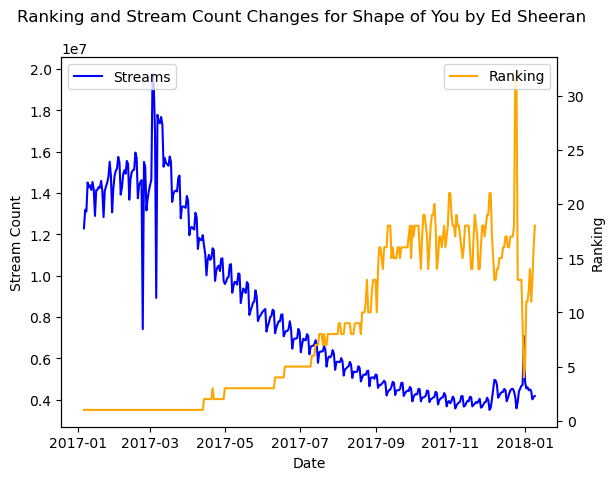

In [11]:
#算出每天中每个tack的Streams总数
Stream_eachDate = df.groupby(['Date','Track Name','Artist'])['Streams'].sum().reset_index()

#按照Streams的总数，对每个日期中的tracks进行排名
Stream_eachDate['Ranking'] = Stream_eachDate.groupby('Date')['Streams'].rank(method='min',ascending=False)

#找到Shape_of_you相关的所有行
Shape_of_you = Stream_eachDate[(Stream_eachDate['Track Name'] == 'Shape of You')&(Stream_eachDate['Artist'] == 'Ed Sheeran')]

#对于Streams和Ranking绘制基于时间序列的lineplot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Shape_of_you['Date'], Shape_of_you['Streams'], label='Streams',color ='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stream Count')
ax1.legend(loc='upper left')

ax2.plot(Shape_of_you['Date'], Shape_of_you['Ranking'], label='Ranking', color='orange')
ax2.set_ylabel('Ranking')
ax2.legend(loc='upper right')

fig.suptitle('Ranking and Stream Count Changes for Shape of You by Ed Sheeran')
plt.show()

# Part2: Bonus

In [388]:
#### The overall data


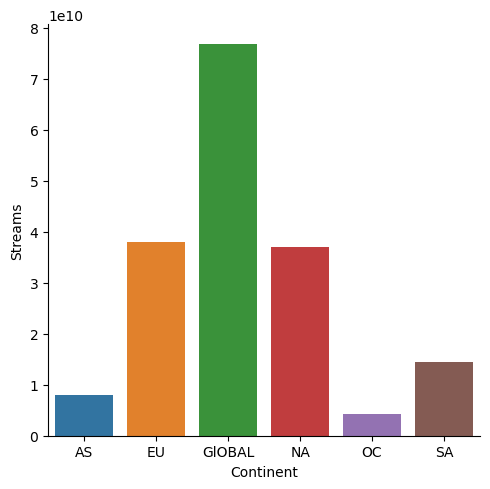

In [10]:
import seaborn as sns

##将Continent中的none替换成GlOBAL
df['Continent'].fillna('GlOBAL', inplace = True)

#计算每个continent的Streams总数
Streams_Continent = df.groupby('Continent')['Streams'].sum().reset_index()

##绘制barchart
sns.catplot(data = Streams_Continent, x= 'Continent', y = 'Streams', kind = 'bar')

<AxesSubplot:xlabel='Date', ylabel='Streams'>

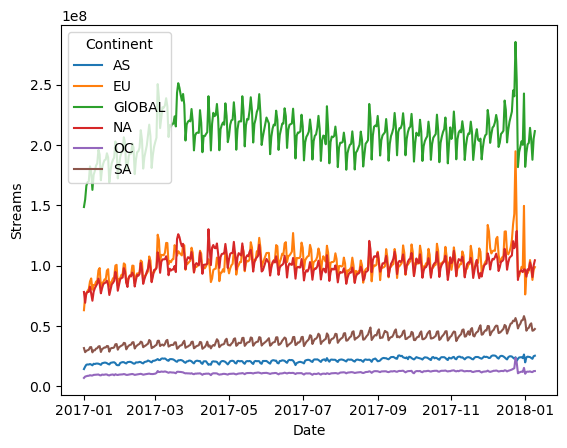

In [11]:
#计算每个日期里每个continent的Streams总数
Streams_Date_Continent = df.groupby(['Date','Continent'])['Streams'].sum().reset_index()

#绘制lineplot
sns.lineplot(data = Streams_Date_Continent, x = 'Date', y = 'Streams', hue = 'Continent')

In [355]:
data = df.sort_values(['Artist', 'Track Name', 'Date'])
data

,Track Name,Artist,Streams,Date,Region,Continent
Position,,,,,,
197,Bailemos juntos,#TocoParaVos,1005,2017-01-01,uy,SA
166,Enganchado #TocoParaVos - Cumbia Mix,#TocoParaVos,1148,2017-01-06,uy,SA
162,Enganchado #TocoParaVos - Cumbia Mix,#TocoParaVos,14864,2017-01-07,ar,SA
127,Enganchado #TocoParaVos - Cumbia Mix,#TocoParaVos,1478,2017-01-07,uy,SA
190,Enganchado #TocoParaVos - Cumbia Mix,#TocoParaVos,11133,2017-01-08,ar,SA
...,...,...,...,...,...,...
137,為愛而愛,鼓鼓,3078,2017-02-28,tw,AS
140,為愛而愛,鼓鼓,3049,2017-03-07,tw,AS
174,到此為止,齊晨,2671,2017-10-14,tw,AS


In [ ]:
data = data.sort_values(['artist', 'track_name', 'date'])
data['next_date'] = data.groupby(['artist', 'track_name'])['date'].shift(-1)

In [344]:
df.describe()

,Streams
count,3441197
mean,51892
std,201804
min,1001
25%,3322
50%,9227
75%,29658
max,11381520


In [12]:
import numpy as np

from IPython.core.interactivesheel import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from matplotlib.pylab import style
style.use('ggplot')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.stats.diagnostic import acorr_1jungbox
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf

SyntaxError: invalid syntax (2818589327.py, line 12)